In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\raghav.aggarwal\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("loan_data 1.csv")

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(307511, 122)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
df.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)>

In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
df.isna().mean()*100


SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [11]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [12]:
df.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [13]:
(df.isnull().sum()/(len(df)))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [14]:
null_columns = df.columns[df.isnull().any()]

# Create a dictionary to store column names and their null value counts
null_columns_count = {}

# Iterate over the columns with null values
for col in null_columns:
    # Count the number of null values in each column
    null_count = df[col].isnull().sum()
    # Store the column name and its null value count in the dictionary
    null_columns_count[col] = null_count

# Print the dictionary
print("Columns with null values and their counts:")
print(null_columns_count)

Columns with null values and their counts:
{'AMT_ANNUITY': 12, 'AMT_GOODS_PRICE': 278, 'NAME_TYPE_SUITE': 1292, 'OWN_CAR_AGE': 202929, 'OCCUPATION_TYPE': 96391, 'CNT_FAM_MEMBERS': 2, 'EXT_SOURCE_1': 173378, 'EXT_SOURCE_2': 660, 'EXT_SOURCE_3': 60965, 'APARTMENTS_AVG': 156061, 'BASEMENTAREA_AVG': 179943, 'YEARS_BEGINEXPLUATATION_AVG': 150007, 'YEARS_BUILD_AVG': 204488, 'COMMONAREA_AVG': 214865, 'ELEVATORS_AVG': 163891, 'ENTRANCES_AVG': 154828, 'FLOORSMAX_AVG': 153020, 'FLOORSMIN_AVG': 208642, 'LANDAREA_AVG': 182590, 'LIVINGAPARTMENTS_AVG': 210199, 'LIVINGAREA_AVG': 154350, 'NONLIVINGAPARTMENTS_AVG': 213514, 'NONLIVINGAREA_AVG': 169682, 'APARTMENTS_MODE': 156061, 'BASEMENTAREA_MODE': 179943, 'YEARS_BEGINEXPLUATATION_MODE': 150007, 'YEARS_BUILD_MODE': 204488, 'COMMONAREA_MODE': 214865, 'ELEVATORS_MODE': 163891, 'ENTRANCES_MODE': 154828, 'FLOORSMAX_MODE': 153020, 'FLOORSMIN_MODE': 208642, 'LANDAREA_MODE': 182590, 'LIVINGAPARTMENTS_MODE': 210199, 'LIVINGAREA_MODE': 154350, 'NONLIVINGAPARTME

In [15]:
total_rows = len(df)

# Get the columns with null values
null_columns = df.columns[df.isnull().any()]

# Create a dictionary to store column names and their null value counts
null_column = {}

# Iterate over the columns with null values
for col in null_columns:
    # Count the number of null values in each column
    null_count = df[col].isnull().sum()
    # Calculate the percentage of null values
    null_percentage = (null_count / total_rows) * 100
    # If null percentage is more than 30%, add the column to the dictionary
    if null_percentage > 40:
        null_column[col] = null_count

# Print the filtered dictionary
print("Columns with null value count more than 40%:")
print(null_column)


Columns with null value count more than 40%:
{'OWN_CAR_AGE': 202929, 'EXT_SOURCE_1': 173378, 'APARTMENTS_AVG': 156061, 'BASEMENTAREA_AVG': 179943, 'YEARS_BEGINEXPLUATATION_AVG': 150007, 'YEARS_BUILD_AVG': 204488, 'COMMONAREA_AVG': 214865, 'ELEVATORS_AVG': 163891, 'ENTRANCES_AVG': 154828, 'FLOORSMAX_AVG': 153020, 'FLOORSMIN_AVG': 208642, 'LANDAREA_AVG': 182590, 'LIVINGAPARTMENTS_AVG': 210199, 'LIVINGAREA_AVG': 154350, 'NONLIVINGAPARTMENTS_AVG': 213514, 'NONLIVINGAREA_AVG': 169682, 'APARTMENTS_MODE': 156061, 'BASEMENTAREA_MODE': 179943, 'YEARS_BEGINEXPLUATATION_MODE': 150007, 'YEARS_BUILD_MODE': 204488, 'COMMONAREA_MODE': 214865, 'ELEVATORS_MODE': 163891, 'ENTRANCES_MODE': 154828, 'FLOORSMAX_MODE': 153020, 'FLOORSMIN_MODE': 208642, 'LANDAREA_MODE': 182590, 'LIVINGAPARTMENTS_MODE': 210199, 'LIVINGAREA_MODE': 154350, 'NONLIVINGAPARTMENTS_MODE': 213514, 'NONLIVINGAREA_MODE': 169682, 'APARTMENTS_MEDI': 156061, 'BASEMENTAREA_MEDI': 179943, 'YEARS_BEGINEXPLUATATION_MEDI': 150007, 'YEARS_BUILD_

In [16]:
for key in null_column:
    # Accessing the value corresponding to each key
   df.drop(columns=[key], inplace=True)

In [17]:
df.shape

(307511, 73)

In [18]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [19]:
df.drop(columns="SK_ID_CURR", inplace=True)

In [20]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [22]:
# NAME_CONTRACT_TYPE
df['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [23]:
df["FLAG_DOCUMENT_18"].value_counts()

FLAG_DOCUMENT_18
0    305011
1      2500
Name: count, dtype: int64

In [24]:
object_columns = df.select_dtypes(include=['object'])
categorical=object_columns.columns
categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [25]:
integer_columns = df.select_dtypes(include=['number'])
numerical=integer_columns.columns

In [26]:
# for i in numerical:
#     df[i].value_counts().plot.bar()

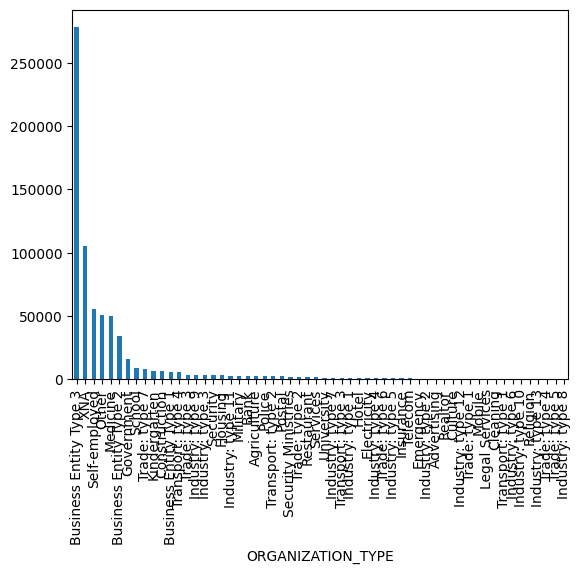

In [27]:
for i in categorical:
    df[i].value_counts().plot.bar()

In [28]:
for col in df.columns:
    print("Value counts for column '{}'".format(col))
    print(df[col].value_counts())
    print() 

Value counts for column 'TARGET'
TARGET
0    282686
1     24825
Name: count, dtype: int64

Value counts for column 'NAME_CONTRACT_TYPE'
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

Value counts for column 'CODE_GENDER'
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Value counts for column 'FLAG_OWN_CAR'
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

Value counts for column 'FLAG_OWN_REALTY'
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

Value counts for column 'CNT_CHILDREN'
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

Value counts for column 'AMT_INCOME_TOTAL'
AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
           

In [29]:
CatCol = ['NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
for col in CatCol:
    value_counts = df[col].value_counts(normalize=True)
 
    other_categories = value_counts[value_counts < 0.02].index
 
    # Replace those categories with 'other'
    df[col] = df[col].apply(lambda x: 'other' if x in other_categories else x)
    print("col ->",df[col].unique(),"\n")

col -> ['Unaccompanied' 'Family' 'Spouse, partner' 'other' nan] 

col -> ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'other'] 

col -> ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'other'] 

col -> ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'other'] 

col -> ['House / apartment' 'other' 'With parents' 'Municipal apartment'] 

col -> ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY'] 

col -> ['Business Entity Type 3' 'School' 'Government' 'other' 'Other' 'XNA'
 'Medicine' 'Business Entity Type 2' 'Self-employed' 'Construction'
 'Kindergarten' 'Trade: type 7'] 



In [30]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
  

In [31]:
df["DAYS_BIRTH"].value_counts()

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: count, Length: 17460, dtype: int64

In [32]:
df['YEARS_BIRTH'] = round(abs(df["DAYS_BIRTH"]) / 365.25)

In [33]:
df['YEARS_EMPLOYED'] = round(abs(df["DAYS_EMPLOYED"]) / 365.25)

In [34]:
df.drop(columns=["DAYS_EMPLOYED"],inplace=True)

In [35]:
df['YEARS_EMPLOYED'].value_counts()

YEARS_EMPLOYED
1000.0    55374
1.0       34796
2.0       30615
3.0       27698
4.0       22925
5.0       19190
6.0       15391
7.0       14084
8.0       12381
9.0        9948
0.0        9752
10.0       8316
11.0       6471
12.0       5611
13.0       4753
14.0       4503
15.0       3906
16.0       2353
17.0       2223
18.0       1922
19.0       1842
20.0       1798
21.0       1507
22.0       1401
23.0       1108
24.0        942
25.0        866
26.0        725
28.0        650
27.0        636
29.0        581
30.0        501
31.0        440
32.0        385
34.0        359
33.0        352
35.0        296
36.0        203
37.0        175
38.0        129
39.0        123
40.0         79
41.0         68
42.0         42
43.0         31
45.0         27
44.0         19
46.0          7
48.0          4
47.0          2
49.0          1
Name: count, dtype: int64

In [36]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [37]:
df['YEARS_REGISTRATION'] = round(abs(df["DAYS_REGISTRATION"]) / 365.25)
df['YEARS_ID_PUBLISH'] = round(abs(df["DAYS_ID_PUBLISH"]) / 365.25)

In [38]:
df.drop(columns=["DAYS_REGISTRATION","DAYS_ID_PUBLISH"],inplace=True)

In [39]:
df.drop(columns=["DAYS_BIRTH"],inplace=True)

In [41]:
# df["DAYS_REGISTRATION"]

In [42]:
df["YEARS_REGISTRATION"].value_counts()

YEARS_REGISTRATION
1.0     15661
2.0     15617
3.0     13868
13.0    12843
12.0    12703
        ...  
63.0        2
62.0        1
65.0        1
68.0        1
64.0        1
Name: count, Length: 66, dtype: int64

In [43]:
df["YEARS_ID_PUBLISH"].value_counts()

YEARS_ID_PUBLISH
12.0    42454
11.0    36394
13.0    30258
7.0     19391
9.0     19097
8.0     18666
6.0     17551
3.0     17420
5.0     17111
10.0    16990
2.0     16578
4.0     16495
1.0     15131
14.0    11543
0.0      7861
15.0     2998
16.0     1227
17.0      344
20.0        1
18.0        1
Name: count, dtype: int64

In [45]:
# df["DAYS_ID_PUBLISH"]

In [46]:
df['YEARS_BIRTH'].value_counts()

YEARS_BIRTH
39.0    8981
38.0    8832
37.0    8722
40.0    8659
28.0    8458
41.0    8448
42.0    8353
32.0    8320
43.0    8247
36.0    8208
44.0    8143
31.0    8014
30.0    7832
34.0    7703
33.0    7703
35.0    7703
29.0    7635
54.0    7486
45.0    7360
46.0    7356
47.0    7181
53.0    7177
55.0    7098
48.0    6908
57.0    6902
49.0    6764
50.0    6717
52.0    6715
56.0    6714
60.0    6582
59.0    6497
27.0    6464
51.0    6435
58.0    6365
61.0    5780
63.0    5451
62.0    5367
64.0    5023
26.0    4386
65.0    4220
25.0    4081
24.0    3831
23.0    3689
66.0    2597
22.0    2017
67.0    1850
68.0    1598
21.0     671
69.0     268
Name: count, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

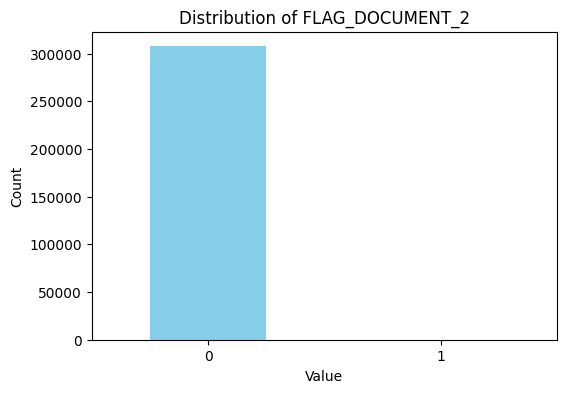

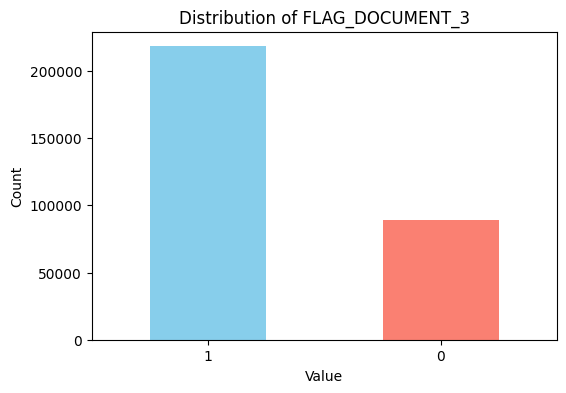

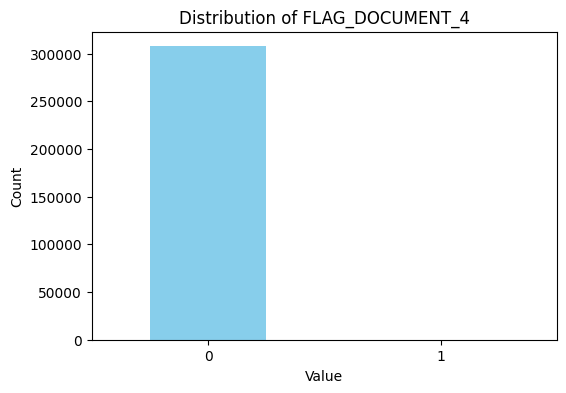

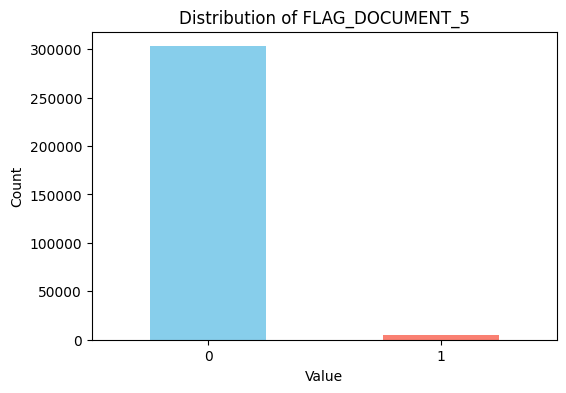

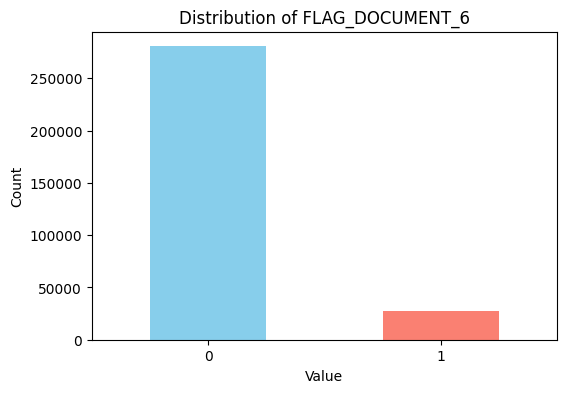

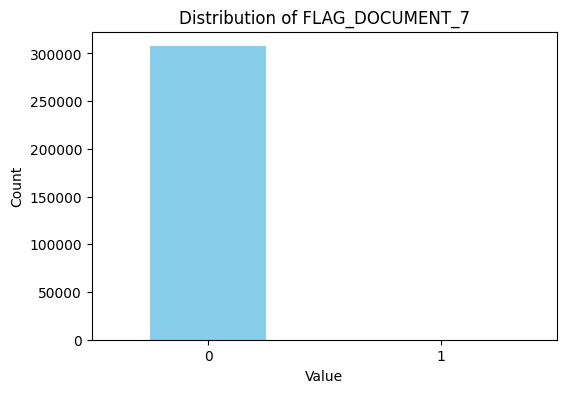

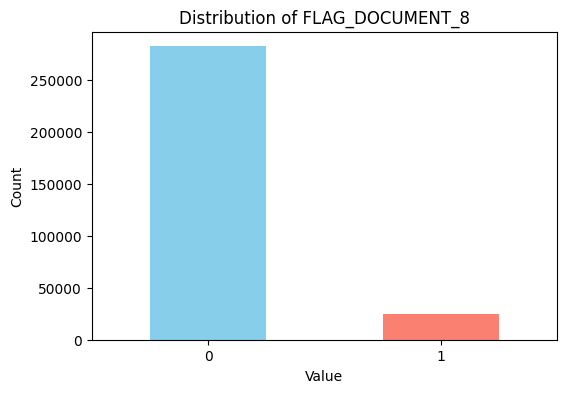

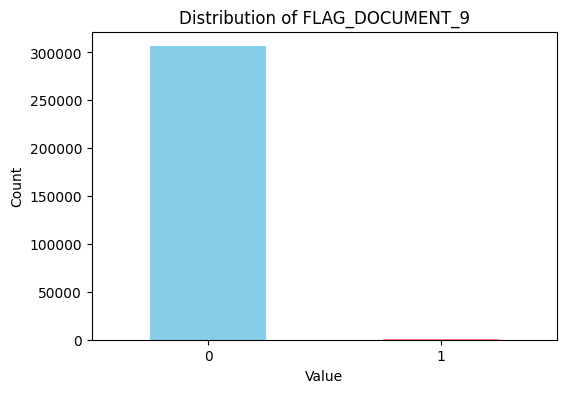

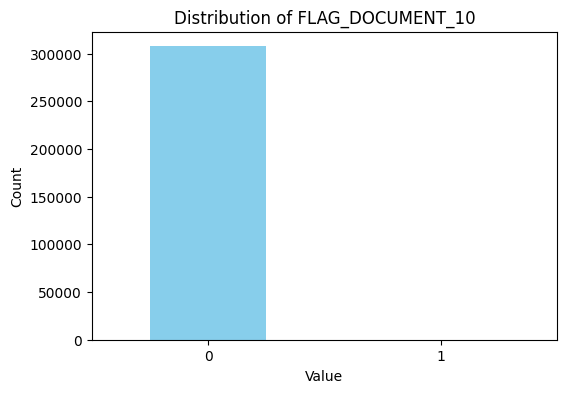

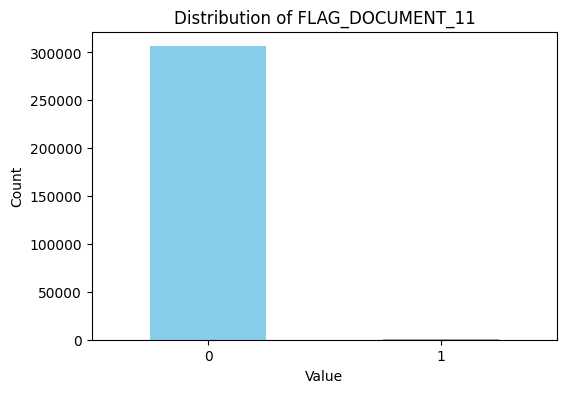

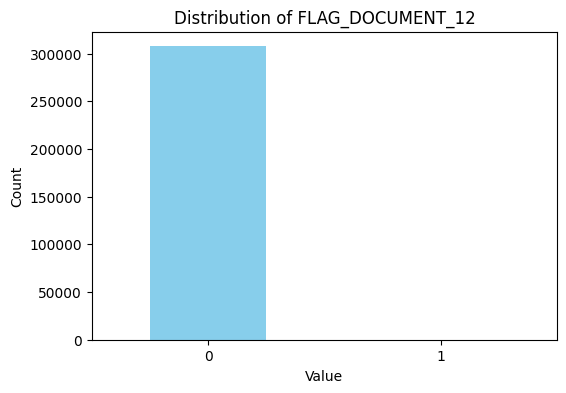

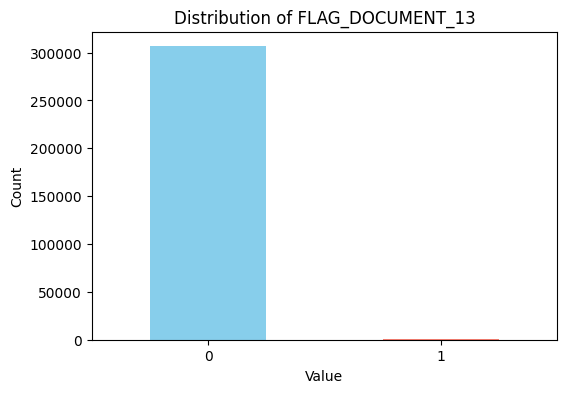

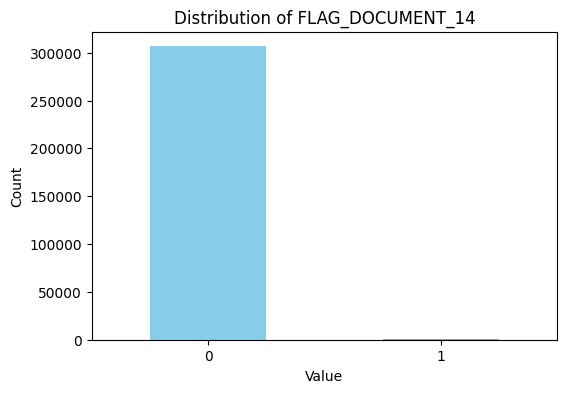

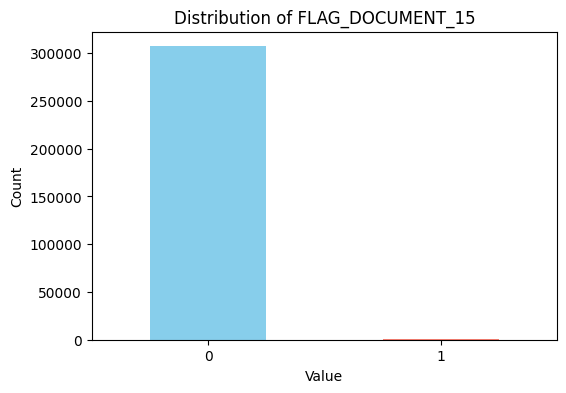

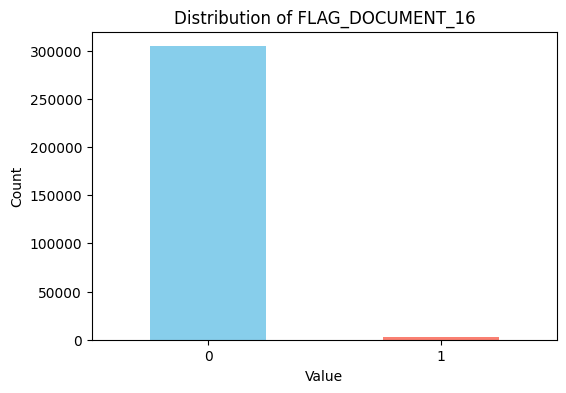

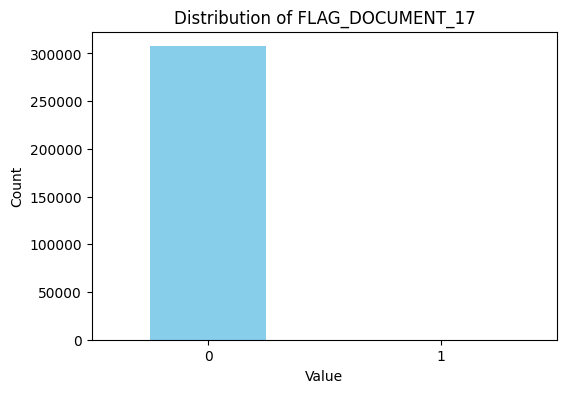

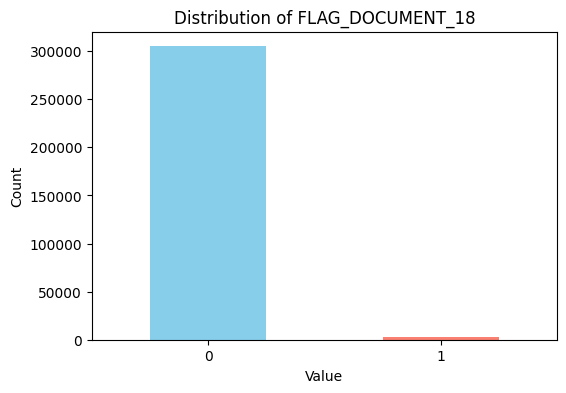

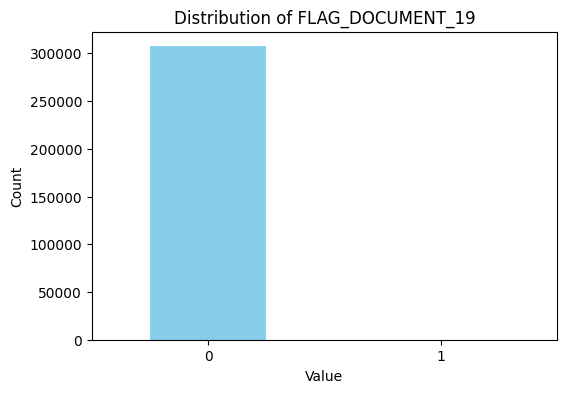

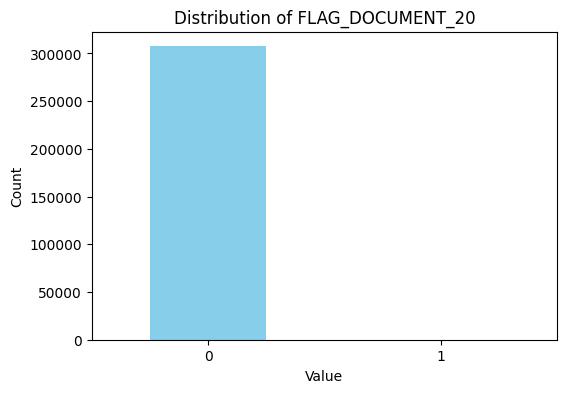

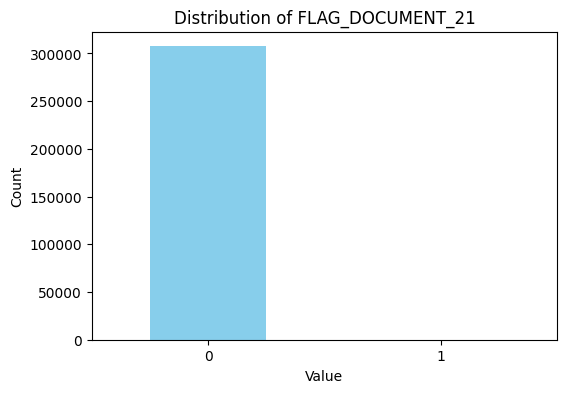

In [48]:
flag_document_columns = df.loc[:, 'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21']

# Plot each FLAG_DOCUMENT column individually
for column in flag_document_columns:
    plt.figure(figsize=(6, 4))
    df[column].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [51]:
df.drop(columns=["HOUR_APPR_PROCESS_START","WEEKDAY_APPR_PROCESS_START","FLAG_DOCUMENT_2", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_21","FLAG_MOBIL", 
 "FLAG_EMP_PHONE",       
 "FLAG_WORK_PHONE",      
 "FLAG_CONT_MOBILE",     
 "FLAG_PHONE",          
 "FLAG_EMAIL","WEEKDAY_APPR_PROCESS_START"],axis=1,inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [ ]:
df["NAME_INCOME_TYPE"].value_counts()

In [ ]:
df["NAME_TYPE_SUITE"].value_counts()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 